# Initial imports

In [1]:
#pip install plotly --upgrade

In [2]:
import pandas as pd   # lib pra trabalhar com o carregamento de arquivos .csv
import numpy as np    # lib pra processamento de matrizes
import seaborn as sns # lib pra visualização de gráficos
import matplotlib.pyplot as plt # lib pra visualização de gráficos também
import plotly.express as px # lib pra gerar gráficos dinâmicos

In [3]:
base_census = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\curso\census.csv')
credit = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\curso\credit_data.csv')

# **Escalonamento dos valores da base de dados de crédito**

In [4]:
count = 0
for col in credit.columns:
    print(count, col)
    count+=1

0 clientid
1 income
2 age
3 loan
4 default


In [5]:
credit.loc[(credit['loan'] >= 10000)]

clientid        income        age          loan  default
29          30  58842.891308  54.510948  10871.186790        0
103        104  57296.160823  25.708482  10601.082783        1
104        105  60844.092495  45.655205  12072.255758        0
150        151  69579.929211  57.756243  10868.241472        0
152        153  65635.661529  51.167714  12701.603475        0
...        ...           ...        ...           ...      ...
1807      1808  57359.552435  34.795263  10011.410682        1
1822      1823  61129.723156  35.109178  11302.767687        0
1890      1891  57303.479761  52.155366  10491.632151        0
1914      1915  68110.239953  32.171575  11029.667710        1
1972      1973  52389.366848  54.969313  10398.820592        0

[121 rows x 5 columns]

In [6]:
credit.loc[credit['age'] < 0, 'age'] = 40.92

In [7]:
credit['age'].fillna(credit['age'].mean(), inplace = True)

In [8]:
x_credit = credit.iloc[:, 1:4].values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [9]:
y_credit = credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [10]:
credit.loc[(credit['clientid'] == 29) | (credit['clientid'] == 31) | (credit['clientid'] == 32)]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)
x_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [12]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [13]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

# **Tabela de dados do censo**

In [14]:
# De acordo com a tabela temos: 
# age            -> Variável Numéricamente Discreta
# workclass      -> Variável Categóricamente Ordinal
# final-weight   -> Variável Numéricamente Contínua (Pontuação de cada pessoa)
# education      -> Variável C. Ordinal (Pode ser considerada uma var Nominal simples, se não for tão importante pro seu objetivo)
# education-num  -> Variável N. Discreta
# marital-status -> Variável C. Nominal
# occupation     -> Variável C. Nominal
# relationship   -> Variável C. Nominal
# race           -> Variável C. Nominal
# sex            -> Variável C. Nominal
# capital-gain   -> Variável N. Contínua
# capital-loos   -> Variável N. Contínua
# hour-per-week  -> Variável N. Discreta
# native-country -> Variável C. Nominal
# income         -> Variável C. Ordinal

In [15]:
count = 0
for col in base_census.columns:
    print(count, col)
    count+=1

0 age
1 workclass
2 final-weight
3 education
4 education-num
5 marital-status
6 occupation
7 relationship
8 race
9 sex
10 capital-gain
11 capital-loos
12 hour-per-week
13 native-country
14 income


In [16]:
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [17]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [18]:
base_census.isnull().sum() # Os dados estão consistentes

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [19]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<AxesSubplot: xlabel='income', ylabel='count'>

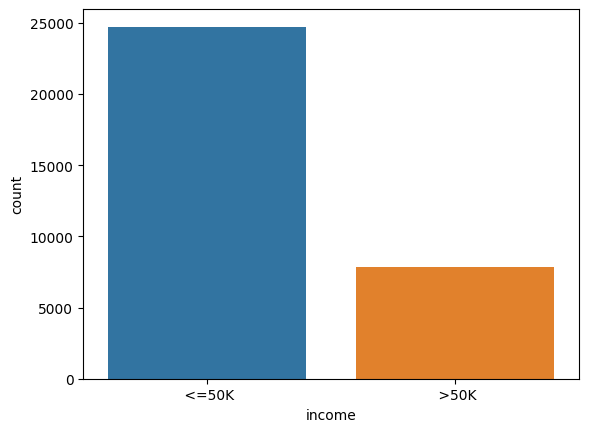

In [20]:
sns.countplot(x = base_census['income']) # Quantidade desbalanceada entre os dois valores

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

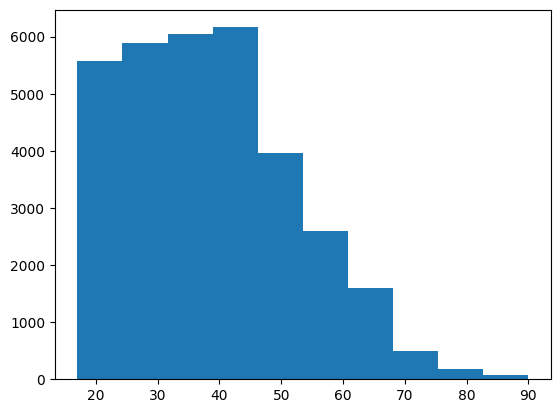

In [21]:
plt.hist(x = base_census['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

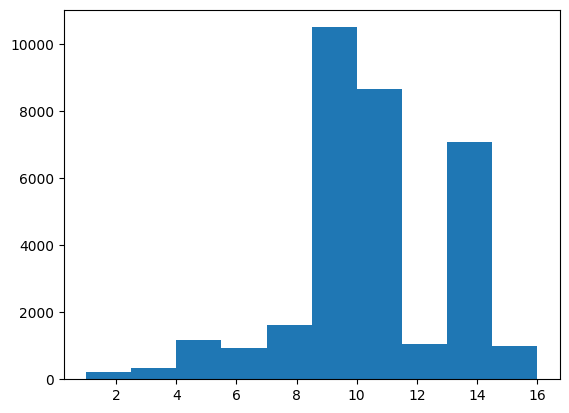

In [22]:
plt.hist(x = base_census['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

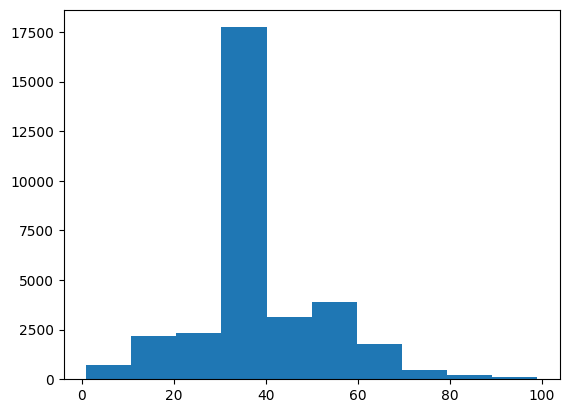

In [23]:
plt.hist(x = base_census['hour-per-week'])

In [24]:
grafico = px.treemap(base_census, path=['workclass', 'age']) # É possível agrupar dados
grafico.show() # Os agrupamentos de uma coluna

In [25]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age']) # É possível agrupar dados
grafico.show() # Os agrupamentos de uma coluna

In [26]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [27]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship', 'income'])
grafico.show()

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [28]:
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [29]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# **LabelEncoder** Transformação de dados categóricos em numéricos 

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder_teste = LabelEncoder()

In [31]:
label_encoder_teste

LabelEncoder()

In [32]:
teste = label_encoder_teste.fit_transform(x_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [33]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [34]:
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3])
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:, 5])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:, 7])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:, 13])

In [35]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

# **OneHotEncoder** Desconsiderar que um atributo seja mais importante que o outro

In [36]:
len(np.unique(base_census['workclass']))

9

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
# Formato de lista no transformers
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [39]:
x_census = onehotencoder_census.fit_transform(x_census).toarray() #Fazer a conversão do numpy array

In [40]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [41]:
x_census.shape

(32561, 108)

In [42]:
# Agora é necessário fazer o escalonamento dos valores
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [43]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# **Divisão das bases em treinamento e teste**

Base de dados credit

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)
# o random_state é muito importante para quando executar, ter a mesma divisão dos registros na base de treinamentos e teste
# e conseguir comparar os resultados

In [46]:
# valor de teste pois definimos 0.25 de size
# 3 colunas retornadas que são: income, age, loan
x_credit_treinamento.shape

(1500, 3)

In [47]:
# 1 coluna que é a classe que paga e não paga
y_credit_treinamento.shape

(1500,)

In [48]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

Base de dados Census

In [49]:
# 15% de teste por causa da base que é muito maior
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [50]:
# 27676 registros e 108 colunas
# 27676 registros e 1 coluna que é a >50K ou <=50K
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [51]:
# 15% dos dados que serão usados para testar o algoritmo
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

# **Salvar as variáveis**

In [52]:
import pickle

In [53]:
with open('credit.pkl', mode = 'wb') as f: # Arquivo que vamos salvar e wb = write, f = variável utilizada para salvar em disco
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f) # variáveis no formato de lista

In [54]:
# fazer a mesma coisa para a base do census
with open('census.pkl', mode = 'wb') as f: # Arquivo que vamos salvar e wb = write, f = variável utilizada para salvar em disco
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f) # variáveis no formato de lista

# Algortimo: **Naïve Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB # Distribuição estatítica normal

Base risco de crédito

In [57]:
risco_credito = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\curso\risco_credito.csv')

In [58]:
risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [59]:
x_risco_credito = risco_credito.iloc[:, 0:4].values # formatar para numpy array

In [60]:
y_risco_credito = risco_credito.iloc[:, 4].values

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [62]:
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_encoder_garantias.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[:, 3])

In [63]:
x_risco_credito # Nessa base de dados não é necessario o OneHotEncoder

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [64]:
import pickle 
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [65]:
naive_risco_credito = GaussianNB()
# Primeiro parâmetro atributos previsores, Segundo parametro são as classes ou respostas esperadas
naive_risco_credito.fit(x_risco_credito, y_risco_credito) # tabela de probabilidades para treinar precisa ser encaixada (fit)

GaussianNB()

In [66]:
# Dados para previsão:
# história boa  (0), dívida alta (0), garantias nenhuma  (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

# A função predict recebe um parâmetro X que é os dados ou os atributos do cliente
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]]) 

In [67]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [68]:
naive_risco_credito.classes_ # Verificar as classes que podem ser retornadas

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [69]:
naive_risco_credito.class_count_ # Verificar os registros de cada classe

array([6., 5., 3.])

In [70]:
naive_risco_credito.class_prior_ # Probabilidades aprior (%) de cada classe

array([0.42857143, 0.35714286, 0.21428571])

Base credit data

In [71]:
import pickle
with open('credit.pkl', 'rb') as f: # read
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [72]:
# 1500 registros c/ idade, renda e divida
# 1500 registros c/ paga ou nao paga o emprestimo
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [73]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [74]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [75]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [76]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
# Comparar as previsoes com as respostas reais

In [78]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
accuracy_score(y_credit_teste, previsoes) # 93% de acertos

0.938

In [81]:
confusion_matrix(y_credit_teste, previsoes) # Mostra uma matriz com acertos classe por classe
# Linha 0 os clientes que pagam os empréstimos     | Coluna 0: Clientes que pagam e foram classificados corretamente Coluna 1: Clientes que pagam porém foram classificados como a coluna número 1 (Erros)
# Linha 1 os clientes que não pagam os empréstimos | Coluna 0: Clientes que não pagam e foram classificados que pagam Coluna 1: Cliente que foram classificados corretamente

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [82]:
from yellowbrick.classifier import ConfusionMatrix # Maneira simplificada de entender as previsoes erradas

0.938

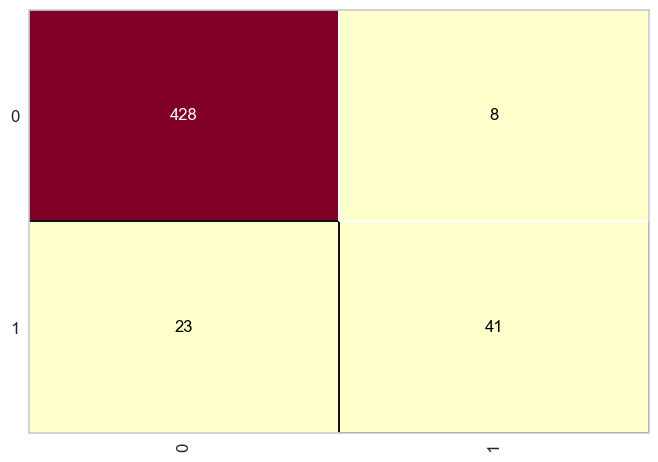

In [83]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento) # Fazer o mesmo treinamento com essa biblioteca
cm.score(x_credit_teste, y_credit_teste)

In [84]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



Base census

In [85]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [86]:
# 27676 registros, 108 atributos (grande por causa do onehotencoder)
# 27676 registros, 1 atributo (> 50k ou <=50k)

x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [87]:
# 4885 pessoas, 108 atributos (grande por causa do onehotencoder)
# 4885 pessoas, 1 atributo (> 50k ou <=50k)
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [88]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)

previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [89]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [90]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

0.4767656090071648

0.4767656090071648

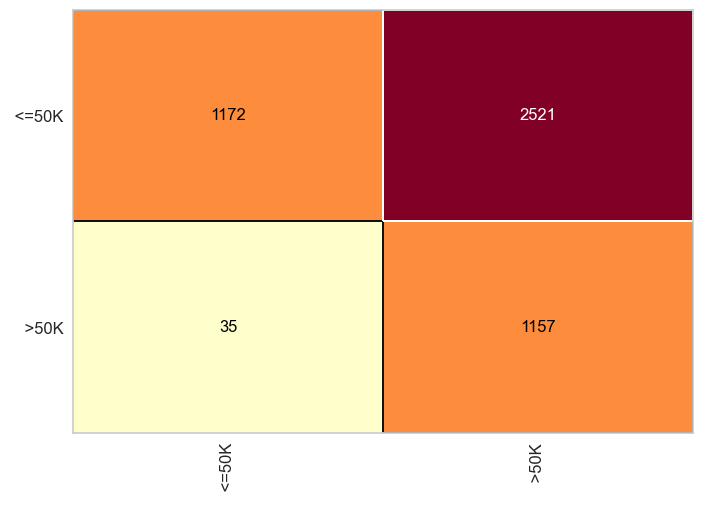

In [91]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento) # Fazer o mesmo treinamento com essa biblioteca
cm.score(x_census_teste, y_census_teste)

In [92]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Algoritmo: **Árvores de decisão**

## Base risco de crédito

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [95]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [96]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy') # Parâmetros: critério, entropia
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [97]:
arvore_risco_credito.feature_importances_ # Retorna a importância de cada um dos atributos (os que possuem o maior ganho de informação)

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [98]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'dívida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'história <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = baixo'),
 Text

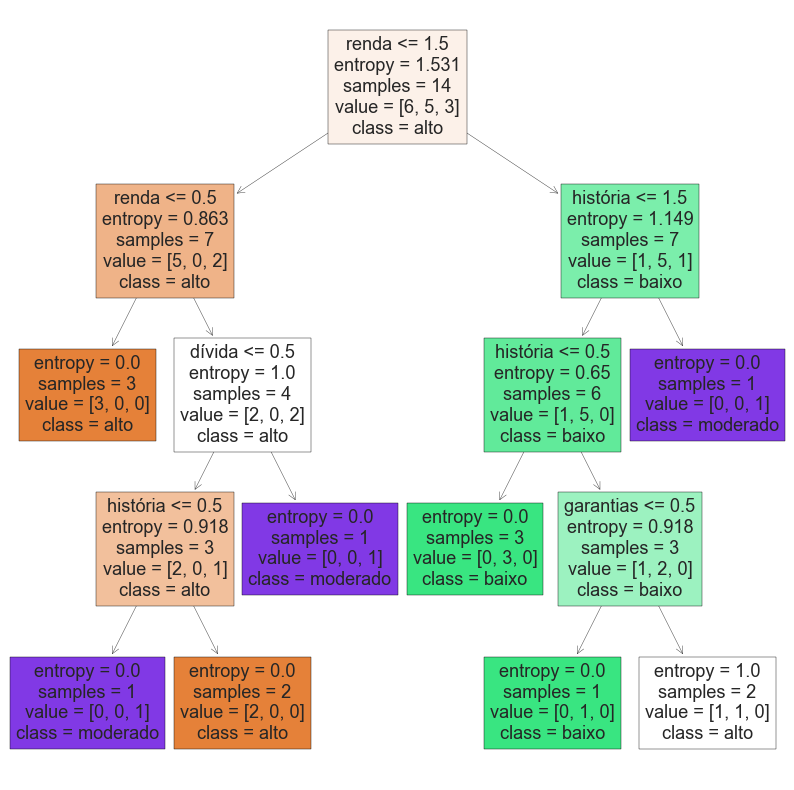

In [99]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True)

In [100]:
# história boa  (0), dívida alta (0), garantias nenhuma  (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

Base credit data

In [101]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [102]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [103]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0) # Random para quando executar o algoritmo gerar os mesmos resultados p/ comparativo
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [104]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
from sklearn.metrics import accuracy_score, classification_report

In [107]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

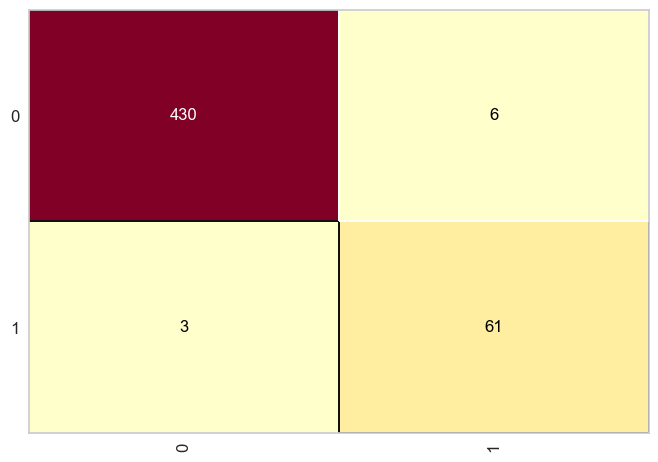

In [108]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [109]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



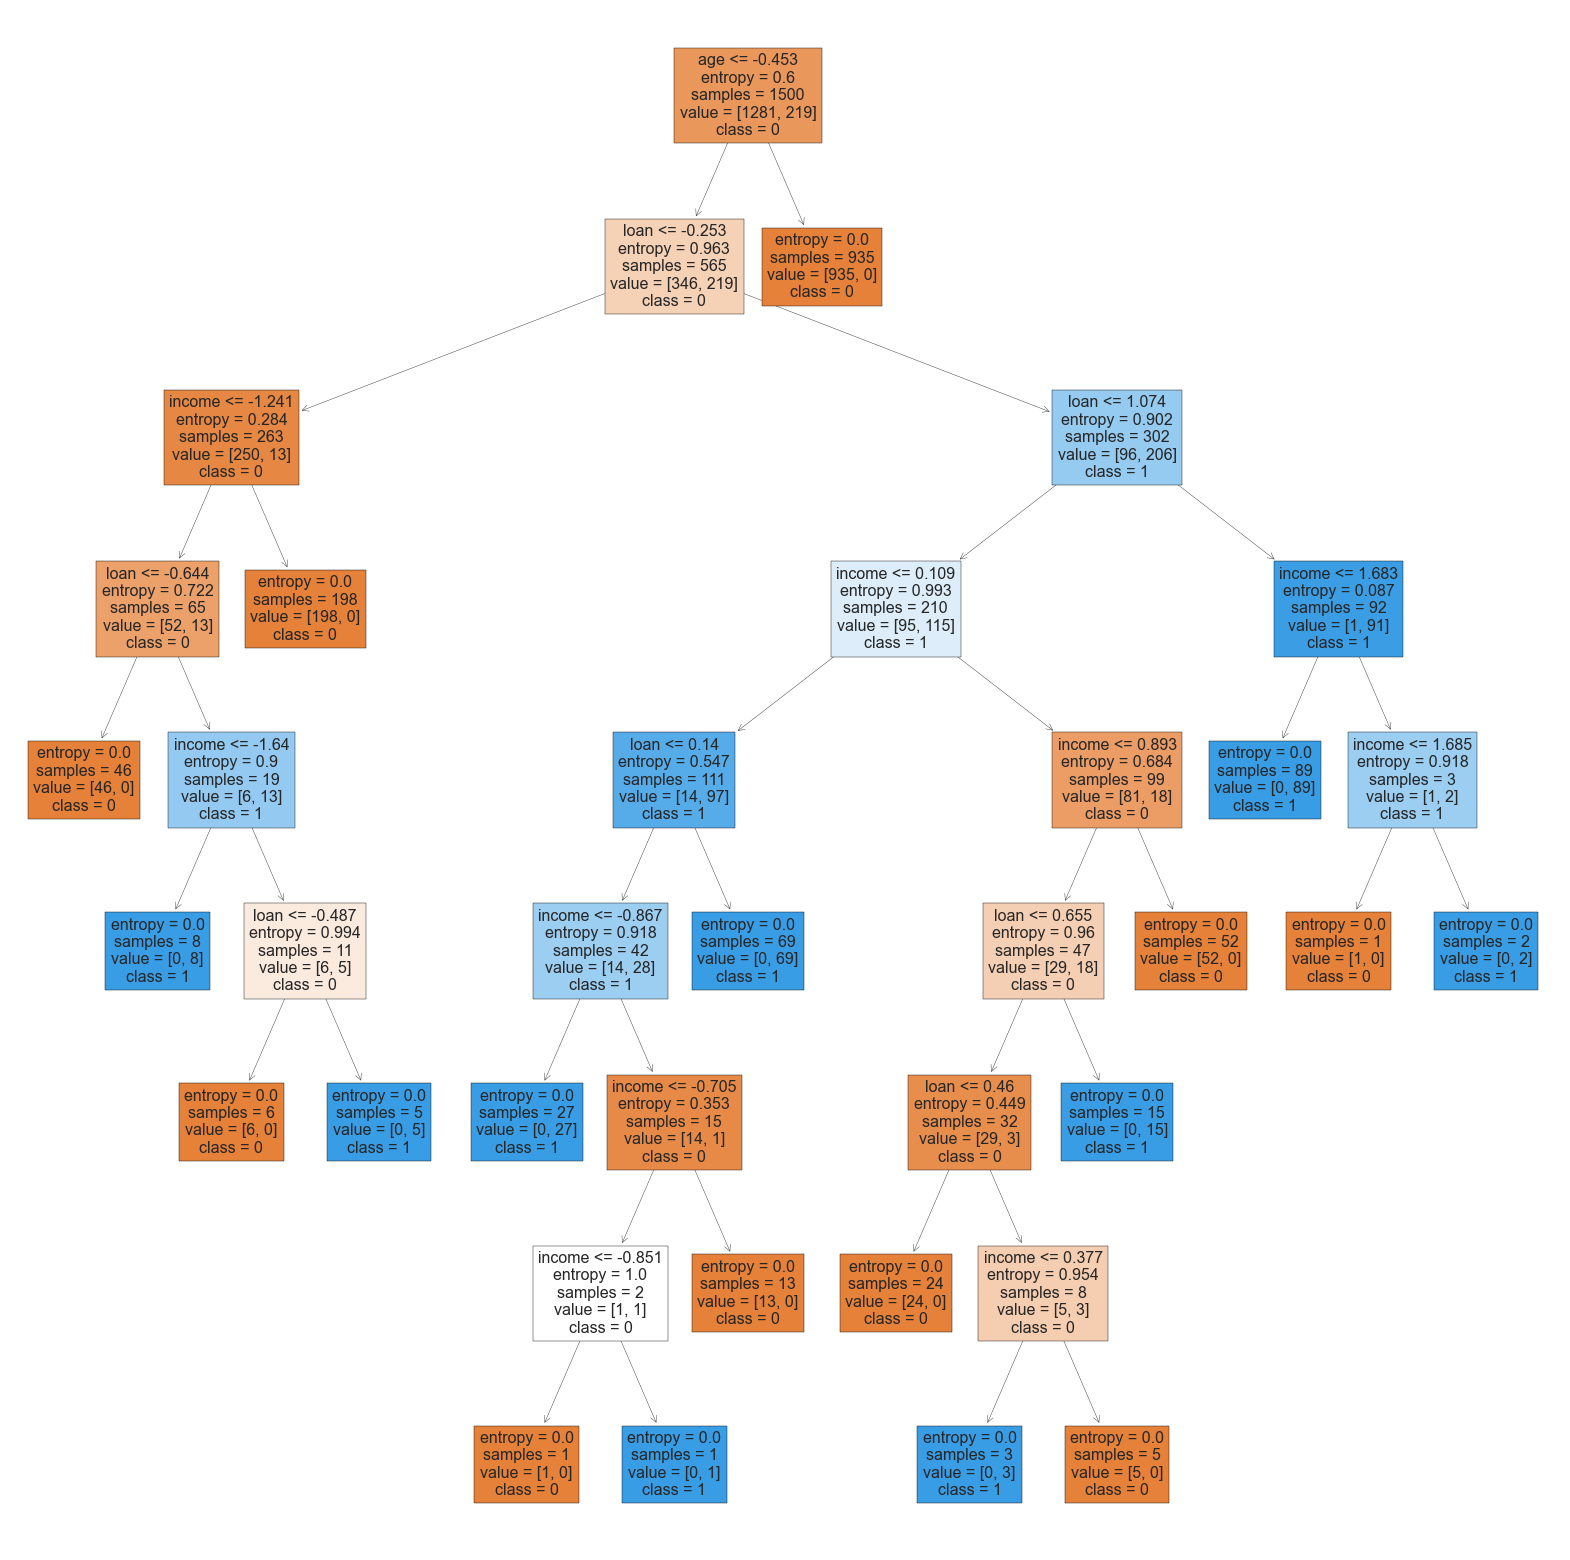

In [110]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names = ['0','1'], filled=True);
figura.savefig('arvore_credit.png')

Base census

In [111]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [112]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [113]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [114]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [115]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [116]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

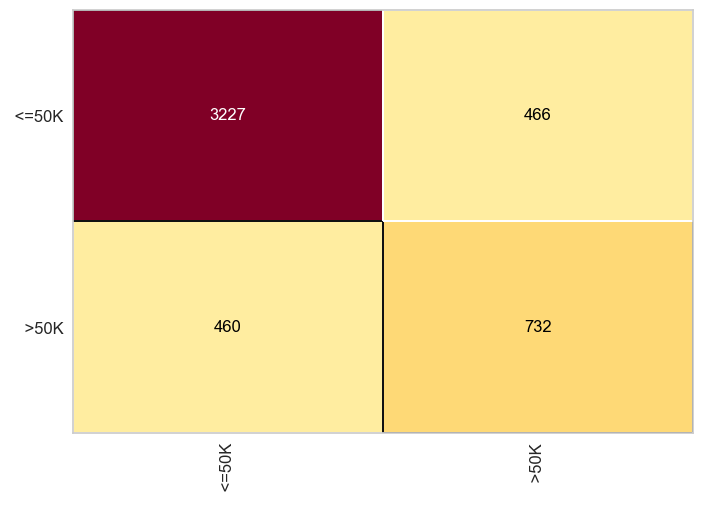

In [117]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [118]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Algoritmo: **Random Forest**

In [119]:
from sklearn.ensemble import RandomForestClassifier

### Base credit data

In [120]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [121]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [122]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

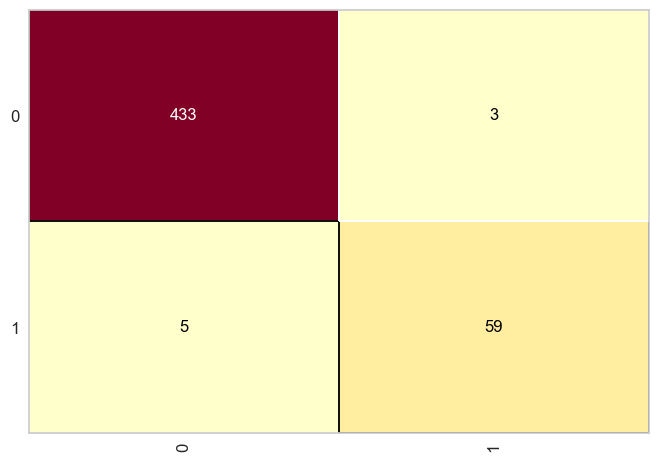

In [125]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

### Base Census

In [126]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [127]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [128]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [129]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [130]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

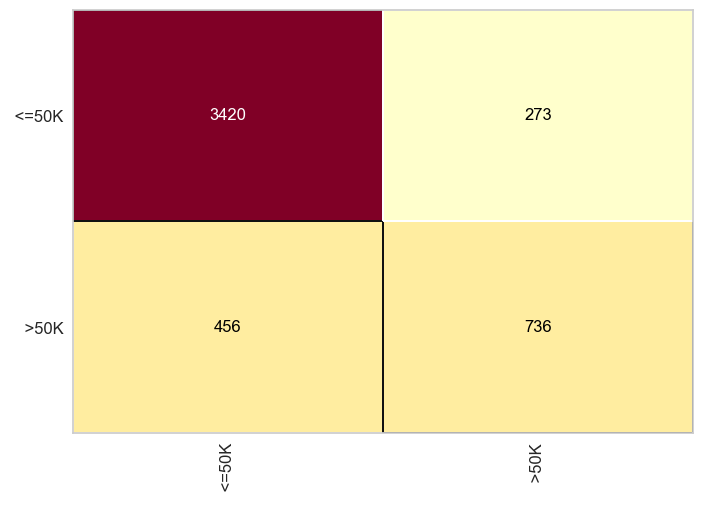

In [131]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

# Algoritmo: **KNN - Aprendizagem baseada em instâncias**

In [132]:
from sklearn.neighbors import KNeighborsClassifier

## Base credit data - 98.60%

In [133]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [134]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [135]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [136]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2) # p = 1 calculo de distancia de manhattam; p = 2 calculo de distancia euclideana
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [137]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [138]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [139]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.986

0.986

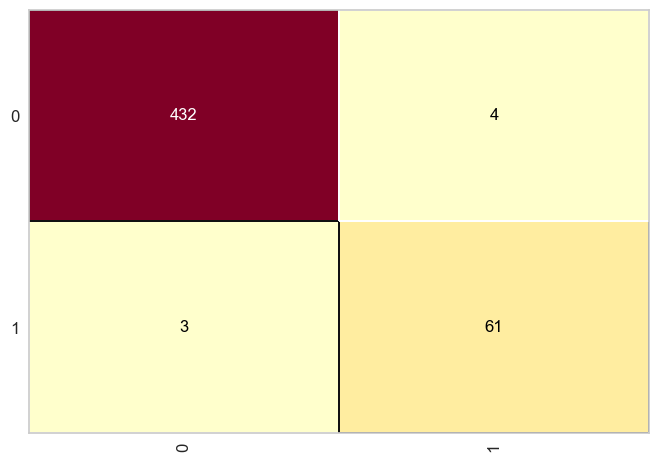

In [140]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [141]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base census - 82.90%

In [142]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [143]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [144]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [145]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [146]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [147]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [148]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8290685772773797

0.8290685772773797

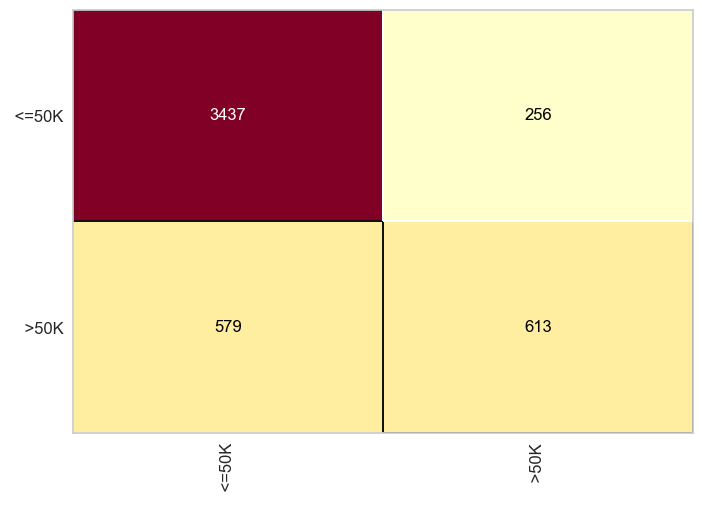

In [149]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [150]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



# Algoritmo: **SVM**

In [151]:
from sklearn.svm import SVC

## Base credit data

In [152]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [153]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 9.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=9.0, random_state=1)

In [154]:
previsoes = svm_credit.predict(X_credit_teste)

In [155]:
accuracy_score(y_credit_teste, previsoes)

0.99

0.99

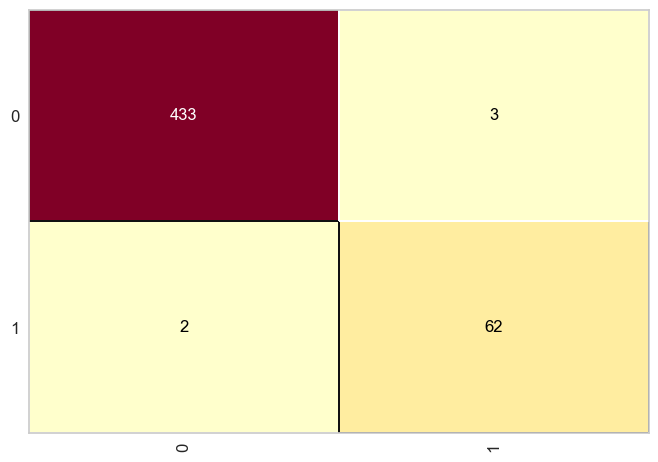

In [156]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## Base Census

In [157]:
svm_census = SVC(kernel='linear', random_state = 1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [158]:
previsoes = svm_census.predict(X_census_teste)

In [159]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

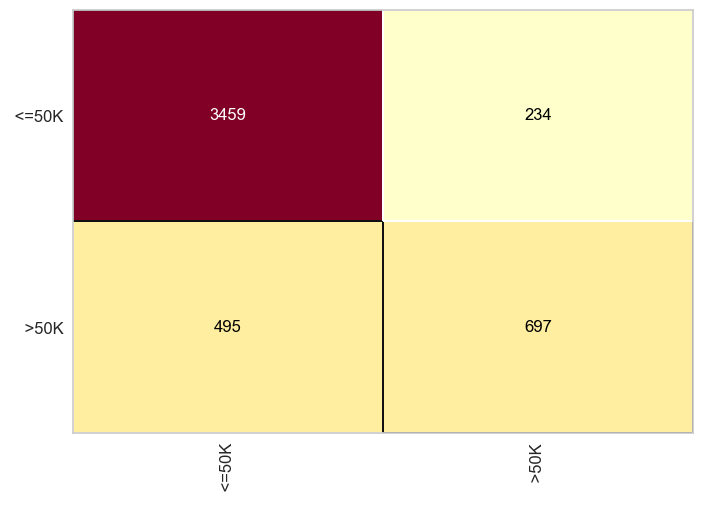

In [160]:
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# Algoritmos por Regras

In [161]:
%pip install Orange3

  Using cached Orange3-3.34.1.tar.gz (27.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scikit_learn-1.1.3-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached baycomp-1.0.2-py3-none-any.whl (17 kB)
  Using cached orange_canvas_core-0.1.29-py3-none-any.whl (499 kB)
  Using cached PyYAML-6.0-cp311-cp311-win_amd64.whl (143 kB)
  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached openTSNE-0.6.2.tar.gz (796 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\thiag\\appdata\\local\\programs\\python\\python311\\lib\\site-packages\\pip-21.3.1.dist-info\\METADATA'



In [163]:
import Orange

ModuleNotFoundError: No module named 'Orange'

## Base Risco Crédito

In [ ]:
base_risco_credito = Orange.data.Table(r'C:\Users\thiag\Downloads\Planilhas Estudos\curso\risco_credito_regras.csv')

In [ ]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [ ]:
base_risco_credito.domain # Domínio -> as colunas

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)


IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [ ]:
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0], dtype=int64)

In [ ]:
base_risco_credito.domain.class_var

DiscreteVariable(name='risco', values=('alto', 'baixo', 'moderado'))

In [ ]:
for i in previsoes:
  print(i)
  print(base_risco_credito.domain.class_var.values[i])

1
baixo
0
alto


## Base Credit Data - 98%

In [ ]:
base_credit = Orange.data.Table(r'C:\Users\thiag\Downloads\Planilhas Estudos\curso\credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_dividida

([[43969.6, 25.483, 7455.92 | 1],
  [59436.8, 60.4719, 9254.24 | 0],
  [54649, 56.4906, 10674.8 | 0],
  [44984.9, 51.7472, 4584.61 | 0],
  [26558.4, 57.8334, 22.3279 | 0],
  ...
 ],
 [[59256.6, 38.5789, 9812.98 | 0],
  [62545.7, 49.0404, 4362.91 | 0],
  [34332.3, 36.5014, 1225.72 | 0],
  [62678.6, 25.8394, 333.441 | 0],
  [22880.7, 18.4289, 1909.22 | 0],
  ...
 ])

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF loan>=7708.31562497011 AND loan>=9698.582169129 THEN default=1 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF loan<=5836.56338145928 AND income>=45971.133494749694 THEN default=0 
IF loan>=4849.33378471958 AND loan>=7708.31562497011 AND loan>=9595.28628892989 THEN default=0 
IF loan>=8034.74777409028 THEN default=1 
IF income>=60503.547852858894 THEN default=0 
IF loan>=4849.33378471958 AND age>=26.854012909811 THEN default=1 
IF income<=22089.8374845274 AND age>=21.3656869572587 THEN default=1 
IF loan>=4849.33378471958 AND age>=26.7719294563867 THEN default=0 
IF loan>=4849.33378471958 AND loan>=6361.97343810153 THEN default=1 
IF income>=52841.5164374746 THEN default=0 
IF income>=45898.513523861795 THEN default=1 
IF loan>=4849.33378471958 AND loan>=5416.3577980789005 THEN default=1 
IF income>=40496.2558229454 THEN default=0 
IF age>=34.101

In [ ]:
previsoes = Orange.evaluation.TestOnTestData(base_treinamento, base_teste, [lambda test_data: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.98])

# Algoritmo: **Majority Learner - Classificador base**

## Base credit data

In [ ]:
base_credit = Orange.data.Table(r'C:\Users\thiag\Downloads\Planilhas Estudos\curso\credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority]) # Indica que estamos treinando e testando na mesma base de dados
# Mas é fato que não existe exatamente um treinamento para este algoritmo

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [ ]:
for registro in base_credit:
  print(registro)

[66155.9, 59.017, 8106.53 | 0]
[34415.2, 48.1172, 6564.75 | 0]
[57317.2, 63.108, 8020.95 | 0]
[42709.5, 45.752, 6103.64 | 0]
[66952.7, 18.5843, 8770.1 | 1]
[24904.1, 57.4716, 15.4986 | 0]
[48430.4, 26.8091, 5722.58 | 0]
[24500.1, 32.8975, 2971 | 1]
[40654.9, 55.4969, 4755.83 | 0]
[25075.9, 39.7764, 1409.23 | 0]
[64131.4, 25.6796, 4351.03 | 0]
[59436.8, 60.4719, 9254.24 | 0]
[61050.3, 26.355, 5893.26 | 0]
[27268, 61.5768, 4759.79 | 0]
[63062, 39.2016, 1850.37 | 0]
[50501.7, -28.2184, 3977.29 | 0]
[43548.7, 39.5745, 3935.54 | 0]
[43378.2, 60.8483, 3277.74 | 0]
[20542.4, 61.6906, 3157.44 | 0]
[58887.4, 26.0761, 4965.52 | 0]
[23000.8, 31.7614, 1148.12 | 0]
[32197.6, -52.4233, 4244.06 | 0]
[23329.3, 48.577, 222.622 | 0]
[27845.8, 51.9706, 4959.92 | 0]
[65302, 48.8409, 5465.27 | 0]
[47451.6, 27.0317, 5361.28 | 0]
[63287, -36.497, 9595.29 | 0]
[45727.5, 55.8399, 6376.82 | 0]
[59417.8, ?, 2082.63 | 0]
[58842.9, 54.5109, 10871.2 | 0]
[48528.9, ?, 6155.78 | 0]
[23526.3, ?, 2862.01 | 0]
[67252.9,

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

## Base Census

In [ ]:
base_census = Orange.data.Table(r'C:\Users\thiag\Downloads\Planilhas Estudos\curso\census_regras.csv')

In [ ]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [ ]:
for registro in base_census:
  print(registro)

[39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States | <=50K]
[50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States | <=50K]
[38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States | <=50K]
[53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States | <=50K]
[28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba | <=50K]
[37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States | <=50K]
[49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica | <=50K]
[52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, Un

In [ ]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [ ]:
24720 / (24720 + 7841)

0.7591904425539756

# Algoritmo: **Regressão Logística**

## Base Risco Crédito

In [165]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [166]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [167]:
y_risco_credito # Apagar os registros moderado: 2, 7, 11 (formato numpyarray)

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [168]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0) # axis=0 significa que esta deletando as linhas/ axis=1 -> colunas
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [174]:
from sklearn.linear_model import LogisticRegression

In [176]:
lr = LogisticRegression(random_state=1)
lr.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [177]:
lr.intercept_

array([-0.80828993])

In [178]:
lr.coef_ #coeficientes p/ cada um dos parametros

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [181]:
previsoes_1 = lr.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes_1

array(['baixo', 'alto'], dtype=object)

## Base credit data

In [182]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [183]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [184]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [186]:
lr = LogisticRegression(random_state=1)
lr.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [187]:
lr.intercept_

array([-6.02976095])

In [188]:
lr.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [189]:
previsoes = lr.predict(X_credit_teste)

In [ ]:
previsoes

In [ ]:
y_credit_teste

In [192]:
accuracy_score(y_credit_teste, previsoes)

0.946

In [193]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base census

In [194]:
import pickle
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_censust_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [197]:
lr = LogisticRegression(random_state=1)
lr.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [199]:
previsoes = lr.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [200]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [202]:
accuracy_score(y_census_teste, previsoes)

0.849539406345957

In [201]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# Algoritmo: **Regressão Linear**

## Regressão Linear Simples

### Base plano saúde

In [203]:
base_plano_saude = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\curso\plano_saude.csv')

In [204]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [205]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [206]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [208]:
X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude # formato de matriz

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [209]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [210]:
regressor_plano_saude.intercept_ # Inicio da linha de regressão

-558.9490909090912

In [211]:
regressor_plano_saude.coef_ # Declive da linha

array([61.86787879])

In [212]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [214]:
# Voltar o valor para o formato de vetor (10, 1) -> (10, 0)
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [216]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = "Regressão Linear")
grafico.show()

In [217]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [218]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)